**Kapittel 1 - Innledning**

Gi litt bakgrunn i dette kapitlet.         

Du vil muligens komme inn på følgende:      
- Hva menes med en turistskatt på overnattinger?
- Hva er begrunnelsen for dens innføring?
- Hvor utbredt er dette tiltaket i andre land/byer?
- Hvilke erfaringer har man gjort med en turistskatt?

Til slutt vil kapitlet forteller leseren om utredningens struktur.

*Kandidatnummer* har fått i oppdrag av næringsminister Jan Christian Vestre å gjøre en samfunnsøkonomisk utredning av tiltak som kan gjøres for å innføre besøksbidrag for turisme. Det vi skal se videre på her er besøksbidrag i form av en turistskatt. Norge har i de siste tiårene opplevd en stor vekst i turisme, og regjeringen har gitt grønt lys for at kommuner kan innføre en turistskatt. Dette er en skatt som eksempelvis betales av overnattingsgjester i hoteller, leiligheter og lignende eller som betales i flybilletten til destinasjonen.

Grunnen til å innføre en slik skatt er for å kunne verne miljøet i kommunene som får ekstra stor belastning og bruk på grunn av overturisme. Turistskatt er en form for skatt som har vært innført allerede i flere andre land, og som idag brukes i for eksempel Nederland, Italia, Spania og Hellas.

Med innføring av en turistskatt er det meningen at etterspørselen skal bli lavere i høysesongene av turismen. Dette vil føre til at det blir mindre bruk og miljøbelastning på grunn av overturisme.

I kapittel 2 skal vi se nærmere på turistnæringen i Nord-Norge. I figurer skal vi nærmere se på hvordan hotellnattinger har utviklet seg over tid, hvilken tid på året som har mest turister, hvilke framkomstmidler turister bruker for å besøke Nord-Norge og hvilke overnattingsmetoder de bruker.

I kapittel 3 skal vi se nærmere på hvordan en turistskatt kan påvirke turistnæringen i Nord-Norge. Vi skal se på hvordan en turistskatt påvirker tilbud og etterspørsel etter hotellrom og flybilletter. Vi skal se på hvor stor effekt vi kan forvente av en turistskatt, og vi skal se på hvilke samfunnsøkonomiske konsekvenser turistskatten vil medbringe.

Kapittel 4 blir en sammenfatning av det vi har sett på i kapittel 2 og 3. Her skal vi konkludere med hvilke konsekvenser en turistskatt kommer til å ha for Nord-Norge.

**Kapittel 2 - Turistnæringen i Norge**

Her gir du leseren et overblikk over markedet som du skal analysere. Om du vil kan du begrense deg til Nord-Norge. Finn data som du laster ned og bruker til å tegne figurer for å gi en indikasjon på størrelsen og viktigheten  på dette markedet. For eksempel:       

- Hvordan har antall hotellovernattinger utviklet seg over tid?
- Når på året kommer turister?
- Hva er fordelingen av turister som ankommer via skip (cruise) og med fly, evt andre fremkomstmidler?
- Hvordan er hotelløkonomien?
- Hvor utbredt er private overnattinger gjennom Airbnb og andre plattformer?
- Hvorfor kan disse momentene være viktig for din analyse?

    To for å vise når på året turistene kommer

    en for å vise over tid

    en figur for hotellovernattinger

In [654]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
# pyjstat er biblioteket for å lese JSON-stat, 'pip install pyjstat' 
from pyjstat import pyjstat

In [655]:
# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/12892/"

In [656]:
# Spørringen og endepunktet til API-et hentes fra Statistikkbanken eller API-konsoll. 
# apiQuery = # lim inn spørringen din her


apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Fylker2020",
        "values": [
          "18",
          "54",
          "21"
        ]
      }
    },
    {
      "code": "InnKvartering1",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [657]:
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

In [658]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [659]:
df['måned'] =df['måned'].str.replace('M', '-')

df

,region,innkvarteringstype,bustadland,statistikkvariabel,måned,value
0,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-01,11397
1,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-02,17745
2,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-03,10980
3,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-04,704
4,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-05,1227
...,...,...,...,...,...,...
103,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-08,9871
104,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-09,4579
105,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-10,3459
106,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-11,2585


In [660]:
svalbard_df = df[df['region'] == 'Svalbard']

# Print the resulting DataFrame
svalbard_df

,region,innkvarteringstype,bustadland,statistikkvariabel,måned,value
72,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-01,4710
73,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-02,6173
74,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-03,3041
75,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-04,186
76,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-05,19
77,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-06,176
78,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-07,1141
79,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-08,2196
80,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-09,734
81,Svalbard,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-10,191


In [661]:
svalbard_df= svalbard_df.copy()

svalbard_df['måned'] = pd.to_datetime(svalbard_df['måned'], format='%Y-%m')

In [662]:
# Group the dataframe by year and summarize the monthly data
svalbard_df = svalbard_df.groupby(svalbard_df['måned'].dt.year).agg({
    'value': 'sum'
})

svalbard_df=svalbard_df.reset_index()

In [663]:
nordland_df = df[df['region'] == 'Nordland - Nordlánnda']
troms_finnmark_df = df[df['region'] == 'Troms og Finnmark - Romsa ja Finnmárku']

nord_norge_df = pd.concat([nordland_df, troms_finnmark_df])

# Print the resulting DataFrame
nord_norge_df

,region,innkvarteringstype,bustadland,statistikkvariabel,måned,value
0,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-01,11397
1,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-02,17745
2,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-03,10980
3,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-04,704
4,Nordland - Nordlánnda,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2020-05,1227
...,...,...,...,...,...,...
67,Troms og Finnmark - Romsa ja Finnmárku,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-08,58848
68,Troms og Finnmark - Romsa ja Finnmárku,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-09,28754
69,Troms og Finnmark - Romsa ja Finnmárku,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-10,31804
70,Troms og Finnmark - Romsa ja Finnmárku,Hotell og liknande overnattingsbedrifter,Utlandet i alt,Overnattingar,2022-11,36845


In [664]:
nord_norge_df= nord_norge_df.copy()

nord_norge_df['måned'] = pd.to_datetime(nord_norge_df['måned'], format='%Y-%m')

type(nord_norge_df.index)

pandas.core.indexes.numeric.Int64Index

In [665]:
# Group the dataframe by year and summarize the monthly data
nord_norge_df = nord_norge_df.groupby(nord_norge_df['måned'].dt.year).agg({
    'value': 'sum'
})

In [666]:
nord_norge_df=nord_norge_df.reset_index()
print(nord_norge_df)

   måned   value
0   2020  336950
1   2021  252613
2   2022  813046


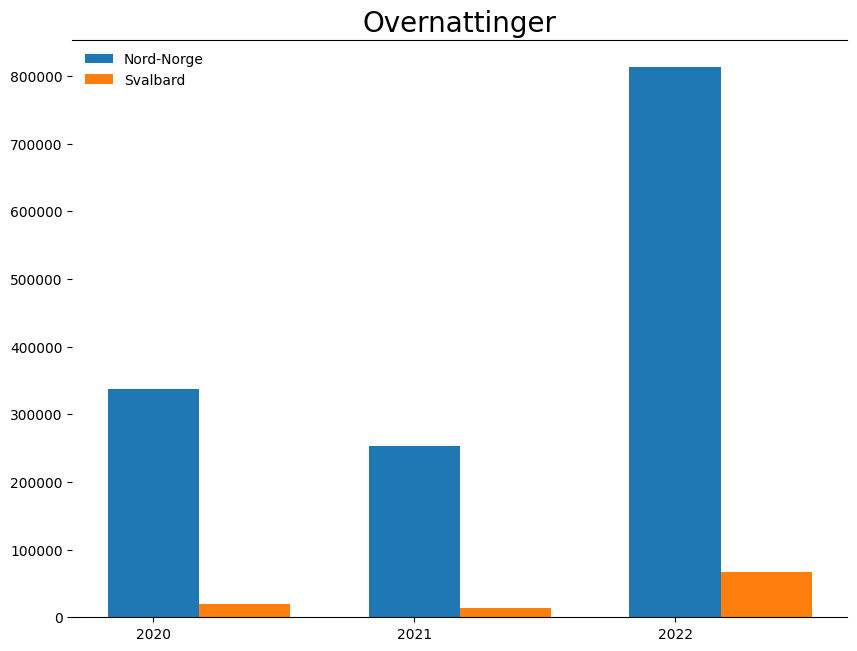

In [669]:
x=nord_norge_df['måned'].astype("string") ## Read as string
y=nord_norge_df['value']
fig, ax = plt.subplots(figsize=(10, 7.5))

# Calculate the width of each bar
width = 0.35

# Plot the first set of bars
ax.bar(x, y, width=width, label='Nord-Norge')
# Plot the second set of bars shifted to the right
ax.bar(svalbard_df.index + width, svalbard_df['value'], width=width, label='Svalbard')

ax.set_title('Overnattinger', fontsize=20)
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.legend(loc='best', frameon=False);

**Kapittel 3 - Samfunnsøkonomiske effekter av en turistskatt**

I dette kapitlet gjennomfører du analysen. Du kan vurdere å ta med følgende elementer:      

- Hva er formålet med å innføre en turistskatt på overnattinger?
- Hvordan fungerer markedet for overnattinger uten en skatt?
- Hvilke endringer forventer vi etter at skatten blir innført?
- Hvilke effektivitets- og fordelingseffekter har dette tiltaket?
- Hvor store effekter forventer vi, og hva er dette avhengig av?
- Finnes det noen estimat på sentrale parameter (for eksempel priselastisiteten på etterspørsel etter overnattinger) som vi kan bruke for å konkretisere analysen?
- En vurdering av hvorvidt formålet med tiltaket oppfylles.

I kurset så langt har vi brukt ulike varianter av markedskrysset for å analysere forskjellige markeder, og dette blir verktøyet som brukes her også. Husk å gi en god forklaring av alle figurer som du lager i forbindelse med analysen. Dere har alt dere trenger! (Om du vil gå noe utover det som vi har snakket om i kurset så langt kan det være en idé å se på kapittel 13 i læreboka om "eksterne virkninger").        

   måned  value
0   2020  19015
1   2021  13583
2   2022  66394
   måned   value
0   2020  336950
1   2021  252613
2   2022  813046


**Kapittel 4 - Konklusjon**

Her oppsummerer du kort dinne funn fra analysen, og råd til Nærings- og fiskeridepartementet.     


Konklusjon her